In [102]:
library(haven)
library(tidyverse)
theme_set(theme_bw())

We will code bar passage as 0 regardless of why the student did not pass. They may have dropped out of law school, never taken the bar, or failed the exam. 

In [88]:
data <- read_sav("lsac.sav")
data.colnames <- colnames(data)
subset_vars <- c("ID","GENDER","MALE",
                 "RACE","ASIAN","BLACK","OTHER","HISP",
                 "FAM_INC",
                 "LSAT","UGPA","TIER",
                 "PASS_BAR","BAR")
data <- data[subset_vars]
data[is.na(data$PASS_BAR) == TRUE,]$PASS_BAR <- 0
data$FAM_INC_1 <- ifelse(data$FAM_INC == 1, 1, 0)
data$FAM_INC_2 <- ifelse(data$FAM_INC == 2, 1, 0)
data$FAM_INC_3 <- ifelse(data$FAM_INC == 3, 1, 0)
data$FAM_INC_4 <- ifelse(data$FAM_INC == 4, 1, 0)
data$FAM_INC_5 <- ifelse(data$FAM_INC == 5, 1, 0)
data <- data[!is.na(data$TIER),]
data <- data[data$BAR!="",]

head(data, 10)

ID GENDER MALE RACE ASIAN BLACK OTHER HISP FAM_INC LSAT UGPA TIER PASS_BAR
1   2 female 0    7    0     0     0     0    5       44.0 3.5  4    1       
2   3 female 0    7    0     0     0     0    4       29.0 3.5  2    1       
3   4 female 0    7    0     0     0     0    5       35.0 3.0  3    0       
4   6 male   1    7    0     0     0     0    3       37.0 3.4  4    1       
5   7 female 0    7    0     0     0     0    4       43.0 3.3  4    1       
6   8 male   1    7    0     0     0     0    4       37.0 2.6  2    0       
7   9 female 0    7    0     0     0     0    4       41.0 3.3  5    1       
8  10 male   1    2    1     0     0     0    4       37.0  NA  6    0       
9  11 male   1    7    0     0     0     0    4       24.5 2.2  3    1       
10 12 female 0    7    0     0     0     0    4       34.0 3.3  3    1       
   BAR               FAM_INC_1 FAM_INC_2 FAM_INC_3 FAM_INC_4 FAM_INC_5
1  a Passed 1st time 0         0         0         0         1        
2  a Passed 1st time 0         0         0         1         0        
3  d Never took bar  0         0         0         0         1        
4  a Passed 1st time 0         0         1         0         0        
5  a Passed 1st time 0         0         0         1         0        
6  d Never took bar  0         0         0         1         0        
7  a Passed 1st time 0         0         0         1         0        
8  c Failed          0         0         0         1         0        
9  b Passed 2nd time 0         0         0         1         0        
10 b Passed 2nd time 0         0         0         1         0

Warning message:
“Removed 145 rows containing missing values (geom_point).”

Saving 6.67 x 6.67 in image
Warning message:
“Removed 145 rows containing missing values (geom_point).”Warning message:
“Removed 225 rows containing missing values (geom_point).”

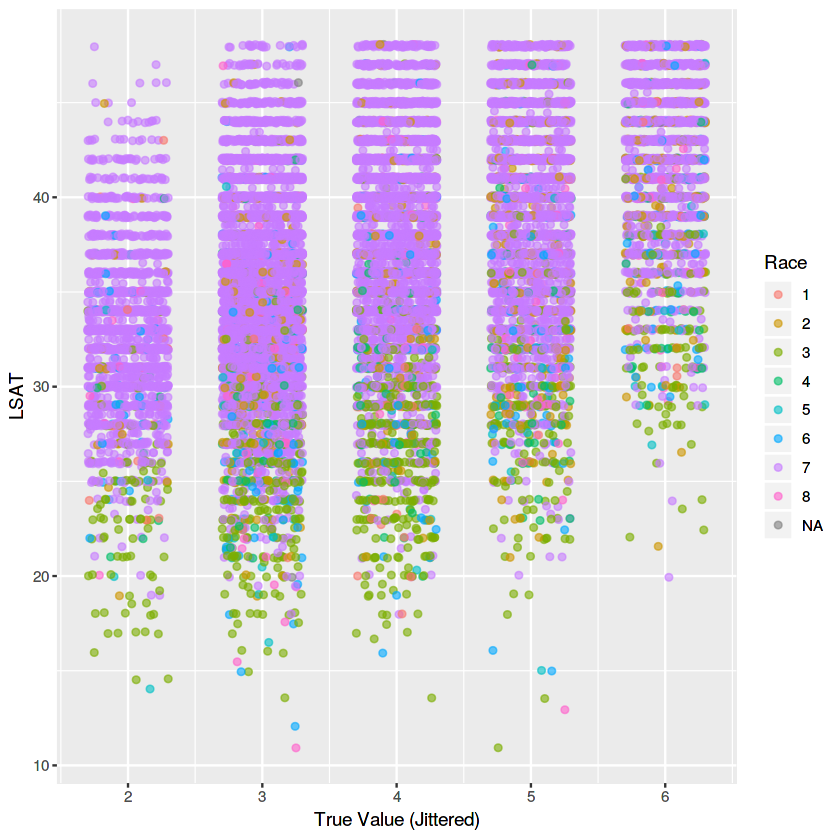

Saving 6.67 x 6.67 in image
Warning message:
“Removed 225 rows containing missing values (geom_point).”

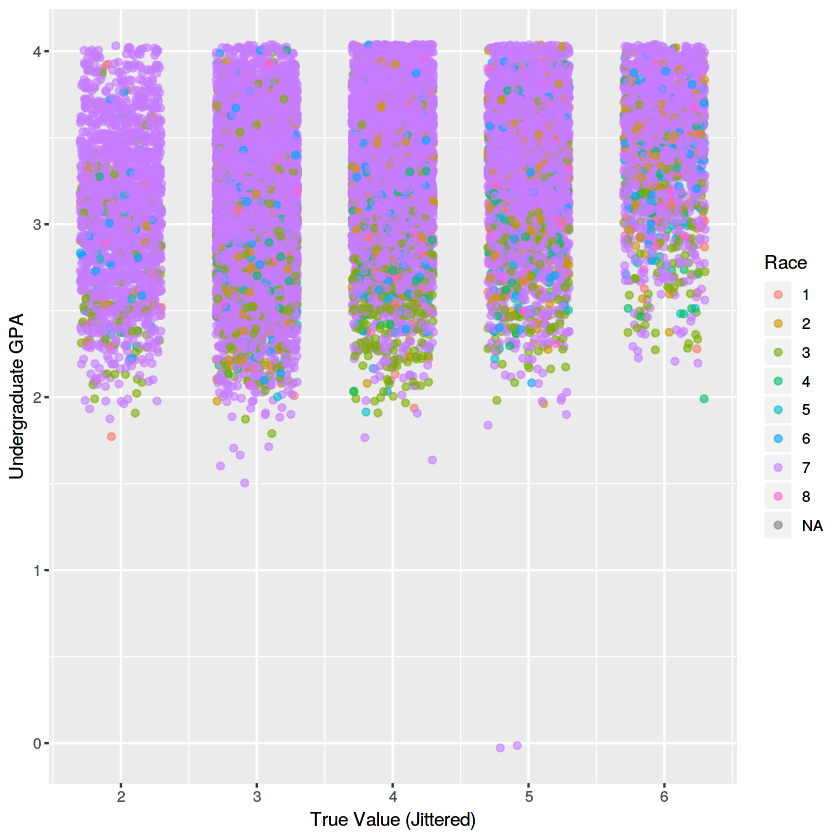

In [92]:
TIER_LSAT <- ggplot(data=data, aes(x=TIER, y=LSAT)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.6, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("True Value (Jittered)") +
    ylab("LSAT")

TIER_LSAT
ggsave(filename="TIER_LSAT.png", plot=TIER_LSAT)

TIER_UGPA <- ggplot(data=data, aes(x=TIER, y=UGPA)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.6, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("True Value (Jittered)") +
    ylab("Undergraduate GPA")
TIER_UGPA
ggsave(filename="TIER_UGPA.png", plot=TIER_UGPA)


We are going to remove tier 1 as outliers. Many of these schools are HBCUs, impacting the racial distirubtion of that tier.

data 

 19  Variables      26449  Observations
--------------------------------------------------------------------------------
ID 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
  26449       0   26449       1   13757    1379    2763    6893   13752   20628 
    .90     .95 
  24746   26111 

lowest :     2     3     4     6     7, highest: 27474 27475 27476 27477 27478 
--------------------------------------------------------------------------------
GENDER 
      n missing  unique 
  26443       6       2 

female (11596, 44%), male (14847, 56%) 
--------------------------------------------------------------------------------
MALE 
      n missing  unique    Info     Sum    Mean 
  26443       6       2    0.74   14847  0.5615 
--------------------------------------------------------------------------------
RACE 
      n missing  unique    Info    Mean 
  26430      19       8    0.42   6.453 

            1    2    3   4   5   6     7   8
Frequency 

Warning message:
“Removed 225 rows containing missing values (geom_point).”

Warning message:
“Removed 98 rows containing missing values (geom_point).”

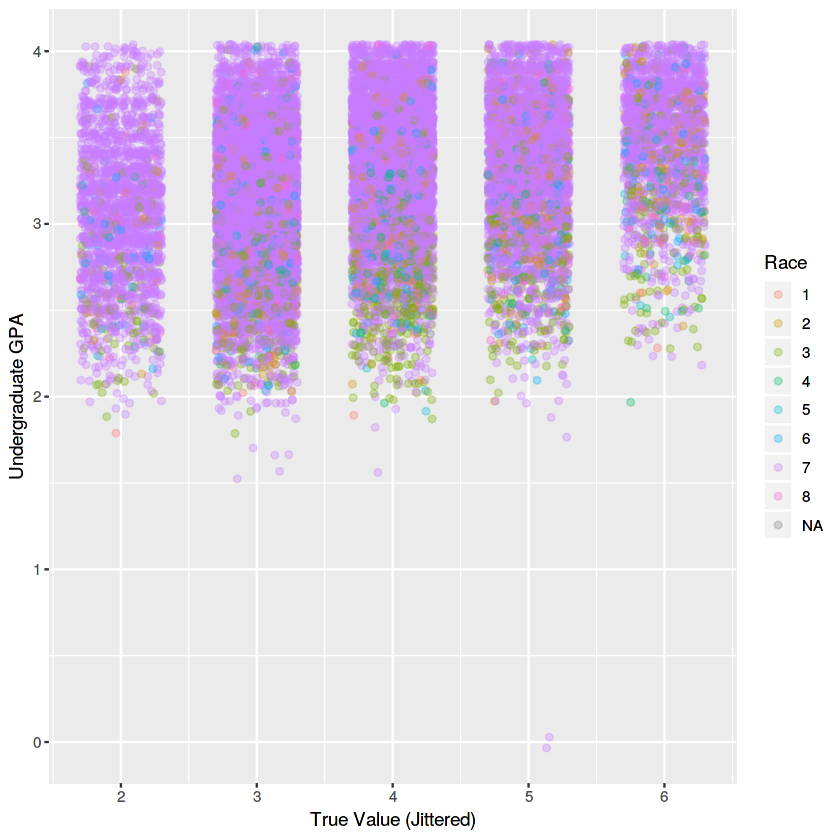

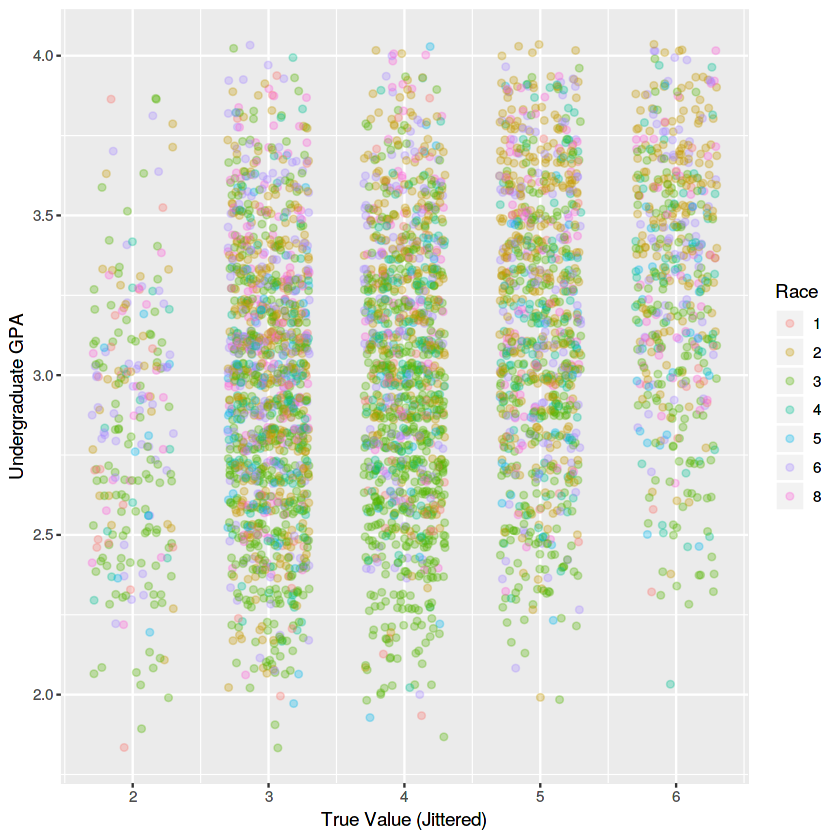

Warning message:
“Removed 344 rows containing missing values (geom_point).”

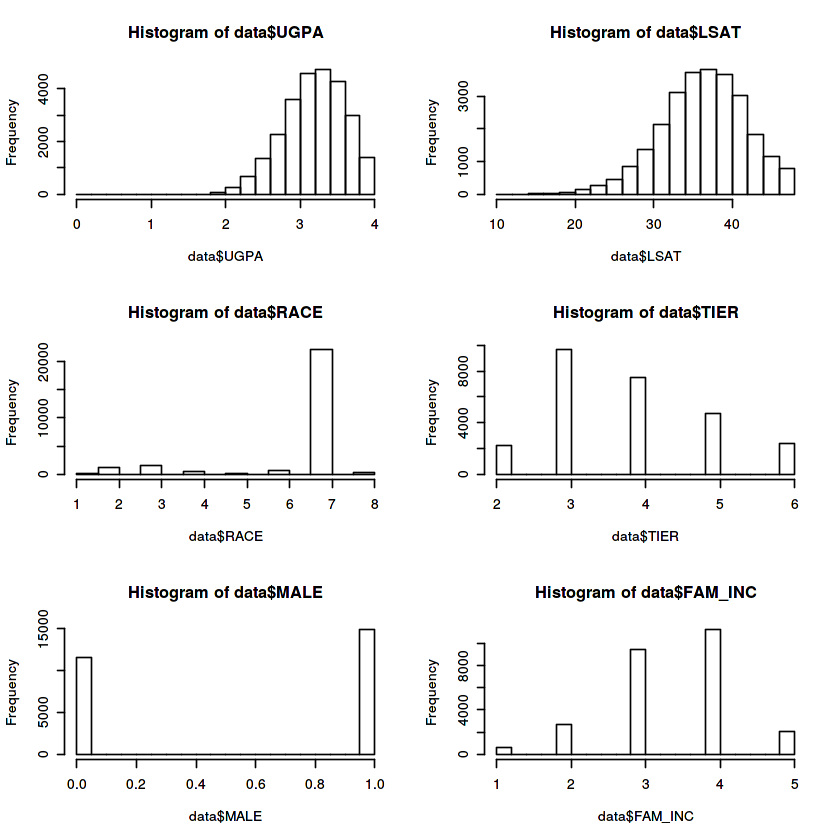

Warning message:
“Removed 119 rows containing missing values (geom_point).”

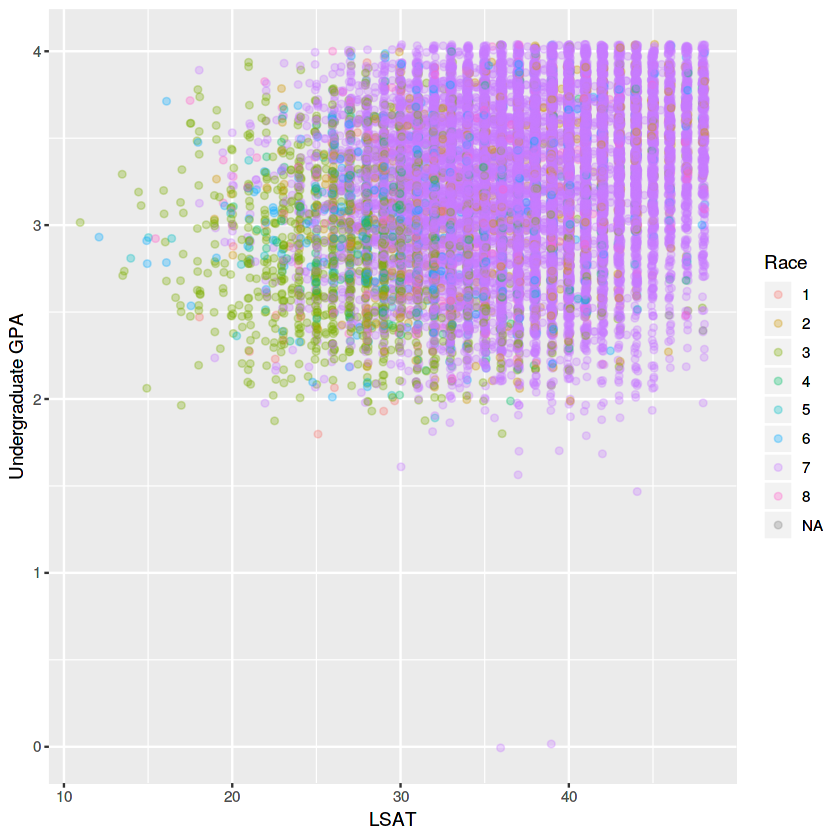

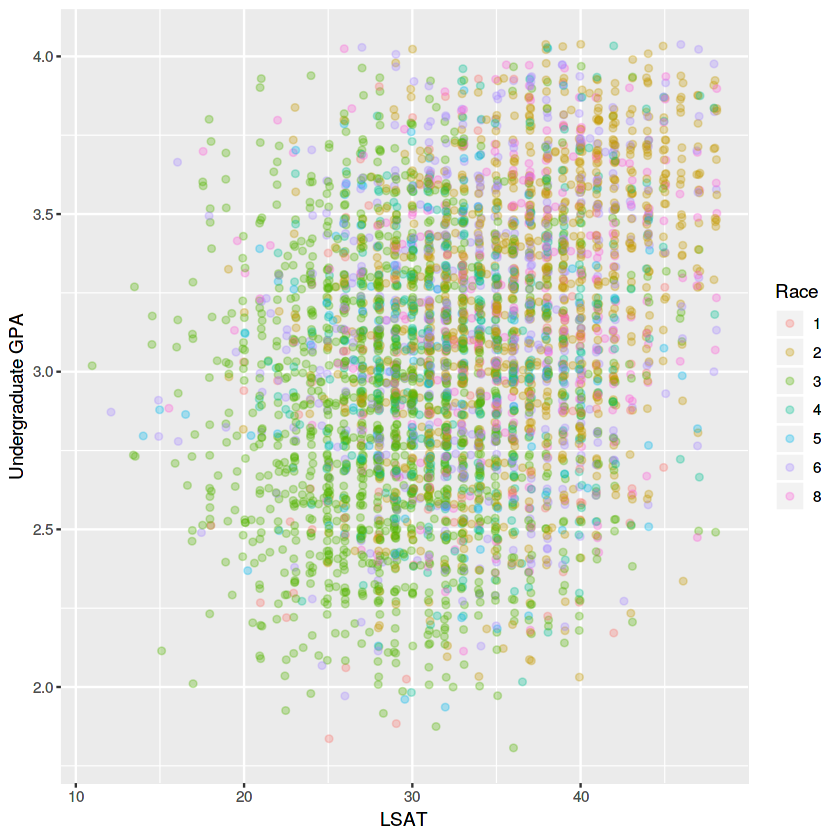

In [100]:
data <- subset(data,data$TIER != 1)
library(Hmisc)
describe(data)

par(mfrow=c(1,2))
TIER_UGPA <- ggplot(data=data, aes(x=TIER, y=UGPA)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("True Value (Jittered)") +
    ylab("Undergraduate GPA")
TIER_UGPA

TIER_UGPA_nonwhite <- ggplot(data=subset(data, RACE!=7), aes(x=TIER, y=UGPA)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("True Value (Jittered)") +
    ylab("Undergraduate GPA")
TIER_UGPA_nonwhite

par(mfrow=c(3,2))
hist(data$UGPA)
hist(data$LSAT)
hist(data$RACE)
hist(data$TIER)
hist(data$MALE)
hist(data$FAM_INC)
par(mfrow=c(1,1))

LSAT_UGPA <- ggplot(data=data, aes(x=LSAT, y=UGPA)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.1) +
    scale_color_discrete(name = "Race") +
    xlab("LSAT") +
    ylab("Undergraduate GPA")
LSAT_UGPA

LSAT_UGPA_nonwhite <- ggplot(data=subset(data, RACE!=7), aes(x=LSAT, y=UGPA)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.1) +
    scale_color_discrete(name = "Race") +
    xlab("LSAT") +
    ylab("Undergraduate GPA")
LSAT_UGPA_nonwhite

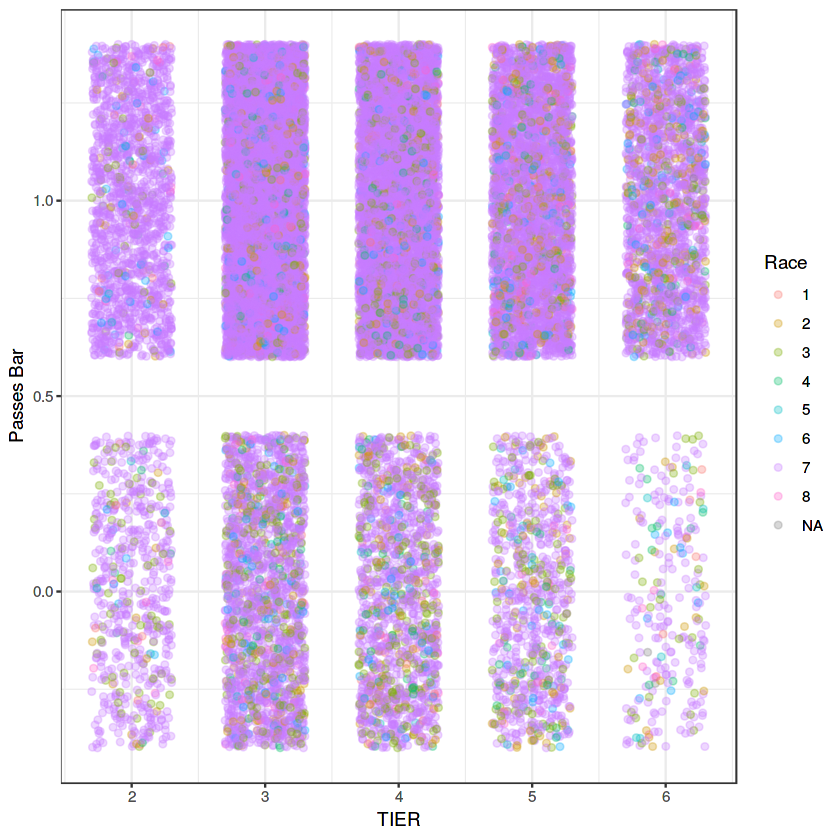

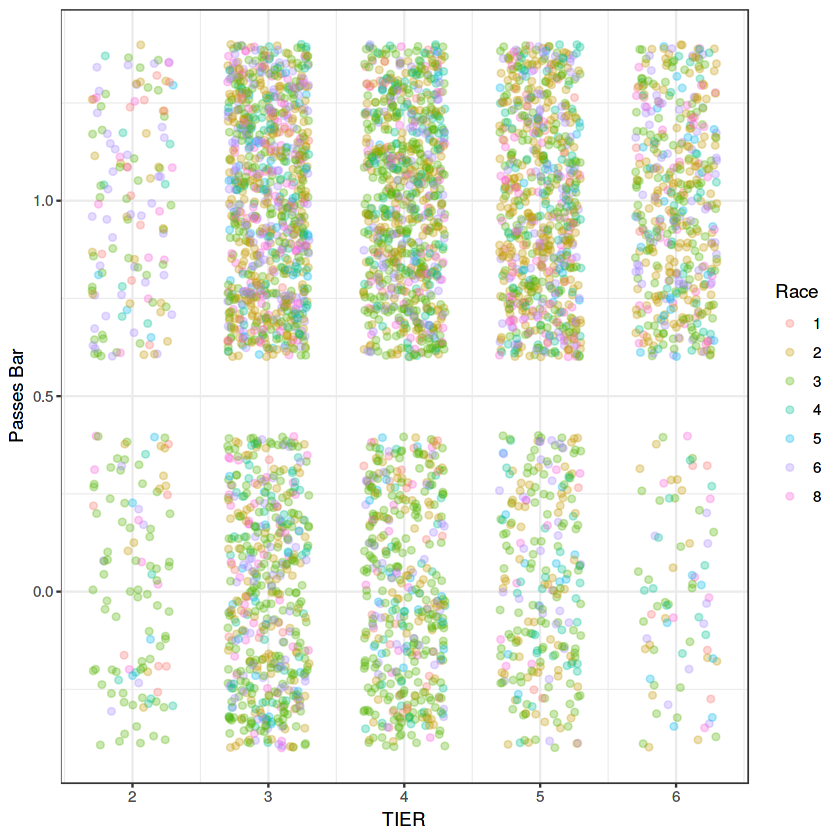

In [103]:
TIER_BAR <- ggplot(data=data, aes(x=TIER, y=PASS_BAR)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("TIER") +
    ylab("Passes Bar")
TIER_BAR

TIER_BAR_nonwhite <- ggplot(data=subset(data, RACE!=7), aes(x=TIER, y=PASS_BAR)) + 
    geom_jitter(aes(color=factor(RACE)), alpha=.3, width=.3) +
    scale_color_discrete(name = "Race") +
    xlab("TIER") +
    ylab("Passes Bar")
TIER_BAR_nonwhite

In [104]:
set.seed(12345)
'%!in%' <- function(x,y)!('%in%'(x,y))
count <- nrow(data)
train_index <- sample(1:count, count*.8, replace=FALSE)
train <- sort(train_index)
train <- data[data$ID %in% train_index,]
test <- data[data$ID %!in% train_index,]

In [3]:
library(caret)
library(xgboost)

ERROR: Error in library(caret): there is no package called ‘caret’
